## SSI w/ DC2 Example

This notebook has an example how to use some of the DC2 SSI catalogs.

In [2]:
import fitsio
import numpy as np

We are going to use the built-in matching to do a basic plot of how magnitudes change.

First we need to find all of the data.

In [3]:
import glob
import os

path_to_cats = "/global/cfs/cdirs/lsst/groups/fake-source-injection/DC2/ssi-cosmodc2/2020_07_16_coadd_sep/ssi_cats"

all_cats = glob.glob(os.path.join(path_to_cats, "ssi_data_*.fits"))

Let's work on the first one.

In [4]:
with fitsio.FITS(all_cats[0], "r") as fp:
    print(fp)


  file: /global/cfs/cdirs/lsst/groups/fake-source-injection/DC2/ssi-cosmodc2/2020_07_16_coadd_sep/ssi_cats/ssi_data_tract4225_patch10.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      orig_cat
  2      BINARY_TBL      ssi_cat
  3      BINARY_TBL      truth_cat


As you can see above, the file has three extensions. These are

 - **orig_cat**: the catalog of the detections from the unmodified image
 - **ssi_cat**: the catalog of the detections from the modified image
 - **truth_cat**: the catalog of the injected sources

We will only need the `ssi_cat` and the `truth_cat`.

In [5]:
ssi_cat = fitsio.read(all_cats[0], ext="ssi_cat")
truth_cat = fitsio.read(all_cats[0], ext="truth_cat")

The catalogs have been pre-matched using algorithms similar to those in the DES Y3 analysis. This matching has two parts

 - **match_flag**: a flag indicating the kind of match
 - **match_index**: an index into the truth catalog for the match
 
See the documentation of the matching routine [here](https://github.com/LSSTDESC/ssi-tools/blob/main/ssi_tools/matching.py#L5) for more detail.

We always want the `match_flag` less than 2.

In [6]:
keep = ssi_cat['match_flag'] < 2

Then you can get the truth entries via this

In [8]:
matched_cat = truth_cat[ssi_cat['match_index'][keep]]

Now we can make a plot!

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'obs - true r-band mag auto')

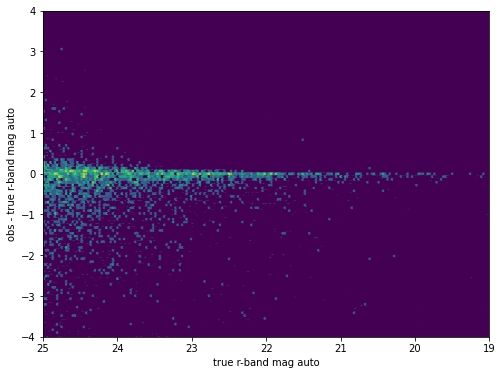

In [17]:
fig, axs = plt.subplots(figsize=(8, 6))

dmag = ssi_cat["mag_auto"][keep] - matched_cat["mag_auto"]
axs.hexbin(matched_cat["mag_auto"], dmag, gridsize=200, bins='log', extent=(25, 19, -4, 4))
axs.set_xlim(25, 19)
axs.set_ylim(-4, 4)
axs.set_xlabel("true r-band mag auto")
axs.set_ylabel("obs - true r-band mag auto")